In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Organizes data directories and structure
builder = tfds.ImageFolder('input')
print(builder.info)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='input',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=315),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=1575, num_shards=1>,
        'train': <SplitInfo num_examples=45980, num_shards=1>,
        'valid': <SplitInfo num_examples=1575, num_shards=1>,
    },
    citation="""""",
)


In [19]:
# Creates the datasets
ds_all_dict = builder.as_dataset()
assert isinstance(ds_all_dict, dict)
print(ds_all_dict.keys())

dict_keys(['test', 'train', 'valid'])


In [33]:
# Gets list of all classes in training datset
label_names = os.listdir('input/train')
print(label_names)

['LILAC ROLLER', 'ROUGH LEG BUZZARD', 'MALLARD DUCK', 'BLACK BAZA', 'OYSTER CATCHER', 'RUFOUS KINGFISHER', 'HOUSE FINCH', 'NORTHERN GANNET', 'HYACINTH MACAW', 'QUETZAL', 'BLACK THROATED WARBLER', 'AMERICAN KESTREL', 'ROCK DOVE', 'HOOPOES', 'CRIMSON SUNBIRD', 'SPANGLED COTINGA', 'NORTHERN SHOVELER', 'COMMON GRACKLE', 'MALABAR HORNBILL', 'SNOWY OWL', 'ANNAS HUMMINGBIRD', 'DOUBLE BARRED FINCH', 'OSPREY', 'CHESTNET BELLIED EUPHONIA', 'BLACK THROATED BUSHTIT', 'EMU', 'EMPEROR PENGUIN', 'GILDED FLICKER', 'NORTHERN MOCKINGBIRD', 'INCA TERN', 'GO AWAY BIRD', 'IWI', 'TURKEY VULTURE', 'GREEN MAGPIE', 'KOOKABURRA', 'RED TAILED THRUSH', 'GREEN BROADBILL', 'NORTHERN PARULA', 'CUBAN TODY', 'COMMON FIRECREST', 'PYGMY KINGFISHER', 'UMBRELLA BIRD', 'REGENT BOWERBIRD', 'GRAY CATBIRD', 'FIRE TAILLED MYZORNIS', 'WHITE THROATED BEE EATER', 'EASTERN BLUEBIRD', 'INDIAN ROLLER', 'RED FACED CORMORANT', 'ARARIPE MANAKIN', 'MASKED BOOBY', 'GREAT KISKADEE', 'NORTHERN GOSHAWK', 'COMMON STARLING', 'STRIPED OWL', 'S

In [34]:
base_dir = 'input'

train_dir  = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

dirs = [train_dir, test_dir, valid_dir]

In [47]:
# Counts the instance of each category in the appropriate directory
def dict_count_labels(direct, labels):
    dict_labels = {}
    dict_directory = "input/" + str(direct) + "/"
    
    for label in labels:
        thingamagig = dict_directory + label
        
        dict_labels[label] = len([name for name in os.listdir(thingamagig)])
    
    return dict_labels

In [49]:
# Create Dictionary of counts for each label
train_dict = dict_count_labels("train", label_names)
test_dict = dict_count_labels("test", label_names)
valid_dict = dict_count_labels("valid", label_names)

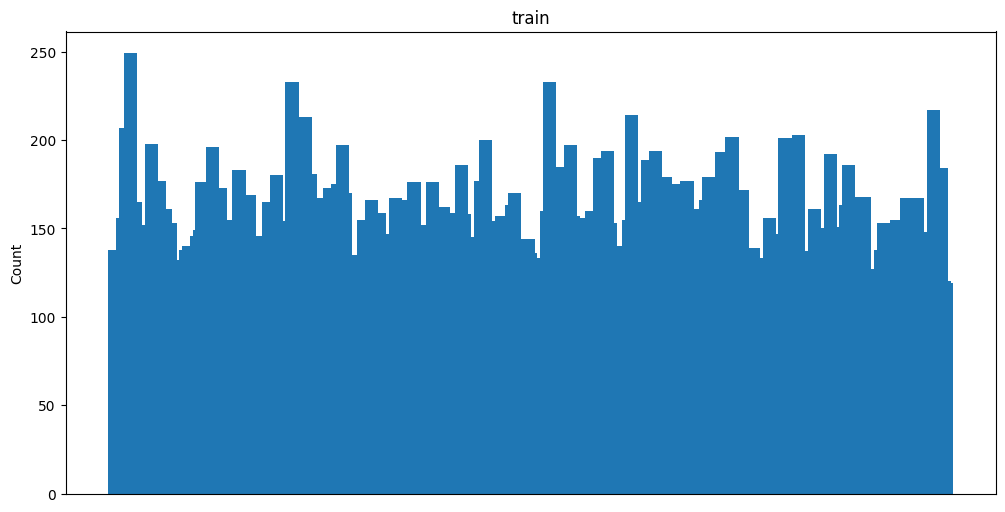

In [78]:
# Chart the number of each category in the Training sample
values = list(train_dict.values())
keys = label_names

plt.figure(figsize = (12,6))
plt.bar(label_names, values, width = 5)
plt.xticks([])
plt.ylabel("Count")
plt.title("train")
plt.show()

In [85]:
print(valid_dict)

{'LILAC ROLLER': 5, 'ROUGH LEG BUZZARD': 5, 'MALLARD DUCK': 5, 'BLACK BAZA': 5, 'OYSTER CATCHER': 5, 'RUFOUS KINGFISHER': 5, 'HOUSE FINCH': 5, 'NORTHERN GANNET': 5, 'HYACINTH MACAW': 5, 'QUETZAL': 5, 'BLACK THROATED WARBLER': 5, 'AMERICAN KESTREL': 5, 'ROCK DOVE': 5, 'HOOPOES': 5, 'CRIMSON SUNBIRD': 5, 'SPANGLED COTINGA': 5, 'NORTHERN SHOVELER': 5, 'COMMON GRACKLE': 5, 'MALABAR HORNBILL': 5, 'SNOWY OWL': 5, 'ANNAS HUMMINGBIRD': 5, 'DOUBLE BARRED FINCH': 5, 'OSPREY': 5, 'CHESTNET BELLIED EUPHONIA': 5, 'BLACK THROATED BUSHTIT': 5, 'EMU': 5, 'EMPEROR PENGUIN': 5, 'GILDED FLICKER': 5, 'NORTHERN MOCKINGBIRD': 5, 'INCA TERN': 5, 'GO AWAY BIRD': 5, 'IWI': 5, 'TURKEY VULTURE': 5, 'GREEN MAGPIE': 5, 'KOOKABURRA': 5, 'RED TAILED THRUSH': 5, 'GREEN BROADBILL': 5, 'NORTHERN PARULA': 5, 'CUBAN TODY': 5, 'COMMON FIRECREST': 5, 'PYGMY KINGFISHER': 5, 'UMBRELLA BIRD': 5, 'REGENT BOWERBIRD': 5, 'GRAY CATBIRD': 5, 'FIRE TAILLED MYZORNIS': 5, 'WHITE THROATED BEE EATER': 5, 'EASTERN BLUEBIRD': 5, 'INDIAN 

In [86]:
print(test_dict)

{'LILAC ROLLER': 5, 'ROUGH LEG BUZZARD': 5, 'MALLARD DUCK': 5, 'BLACK BAZA': 5, 'OYSTER CATCHER': 5, 'RUFOUS KINGFISHER': 5, 'HOUSE FINCH': 5, 'NORTHERN GANNET': 5, 'HYACINTH MACAW': 5, 'QUETZAL': 5, 'BLACK THROATED WARBLER': 5, 'AMERICAN KESTREL': 5, 'ROCK DOVE': 5, 'HOOPOES': 5, 'CRIMSON SUNBIRD': 5, 'SPANGLED COTINGA': 5, 'NORTHERN SHOVELER': 5, 'COMMON GRACKLE': 5, 'MALABAR HORNBILL': 5, 'SNOWY OWL': 5, 'ANNAS HUMMINGBIRD': 5, 'DOUBLE BARRED FINCH': 5, 'OSPREY': 5, 'CHESTNET BELLIED EUPHONIA': 5, 'BLACK THROATED BUSHTIT': 5, 'EMU': 5, 'EMPEROR PENGUIN': 5, 'GILDED FLICKER': 5, 'NORTHERN MOCKINGBIRD': 5, 'INCA TERN': 5, 'GO AWAY BIRD': 5, 'IWI': 5, 'TURKEY VULTURE': 5, 'GREEN MAGPIE': 5, 'KOOKABURRA': 5, 'RED TAILED THRUSH': 5, 'GREEN BROADBILL': 5, 'NORTHERN PARULA': 5, 'CUBAN TODY': 5, 'COMMON FIRECREST': 5, 'PYGMY KINGFISHER': 5, 'UMBRELLA BIRD': 5, 'REGENT BOWERBIRD': 5, 'GRAY CATBIRD': 5, 'FIRE TAILLED MYZORNIS': 5, 'WHITE THROATED BEE EATER': 5, 'EASTERN BLUEBIRD': 5, 'INDIAN 

In [94]:
class_number_train = len(list(train_dict.values()))
class_number_valid = len(list(valid_dict.values()))
class_number_test = len(list(test_dict.values()))

print("Train sample classes: " + str(class_number_train))
print("Validation sample classes: " + str(class_number_valid))
print("Test sample classes: " + str(class_number_test))

Train sample classes: 315
Validation sample classes: 315
Test sample classes: 315


Looking at the number of each category in each sample there are a few things to note. First, the validation and test samples each contain 5 of all 315 labels. This is good for the purposes of creating a parallel between the two, but it is important to keep in mind that this is not entirely indicative of good results without more test samples that are not augmented or changed on purpose. Naturally taken pictures are the best for the purposes of these sets.

The other thing to keep in mind is the training sample, which contains at least 150 of all 315 classes. It is good to have such a large sample size. However, neural networks work best with even larger sample sizes to learn from. This means that data augmentation is most certainly necessary to increase the number of samples for optimal performance. This will not only result in more data, but also increase the amount of relevant and useful information. Because these images will also be different from the base image, there shoudl be less concern of overfitting if done properly.

In [ ]:
# View a few of the images
plt.figure(figsize=(8,8))
for i in range(0, 9):
  plt.subplot(3, 3, + 1 + i)
  plt.imshow(train_ds[i].reshape(32, 32, 3))